In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
# Load the dataset
data = pd.read_csv('National_Stock_Exchange_of_India_Ltd.csv')
data.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB


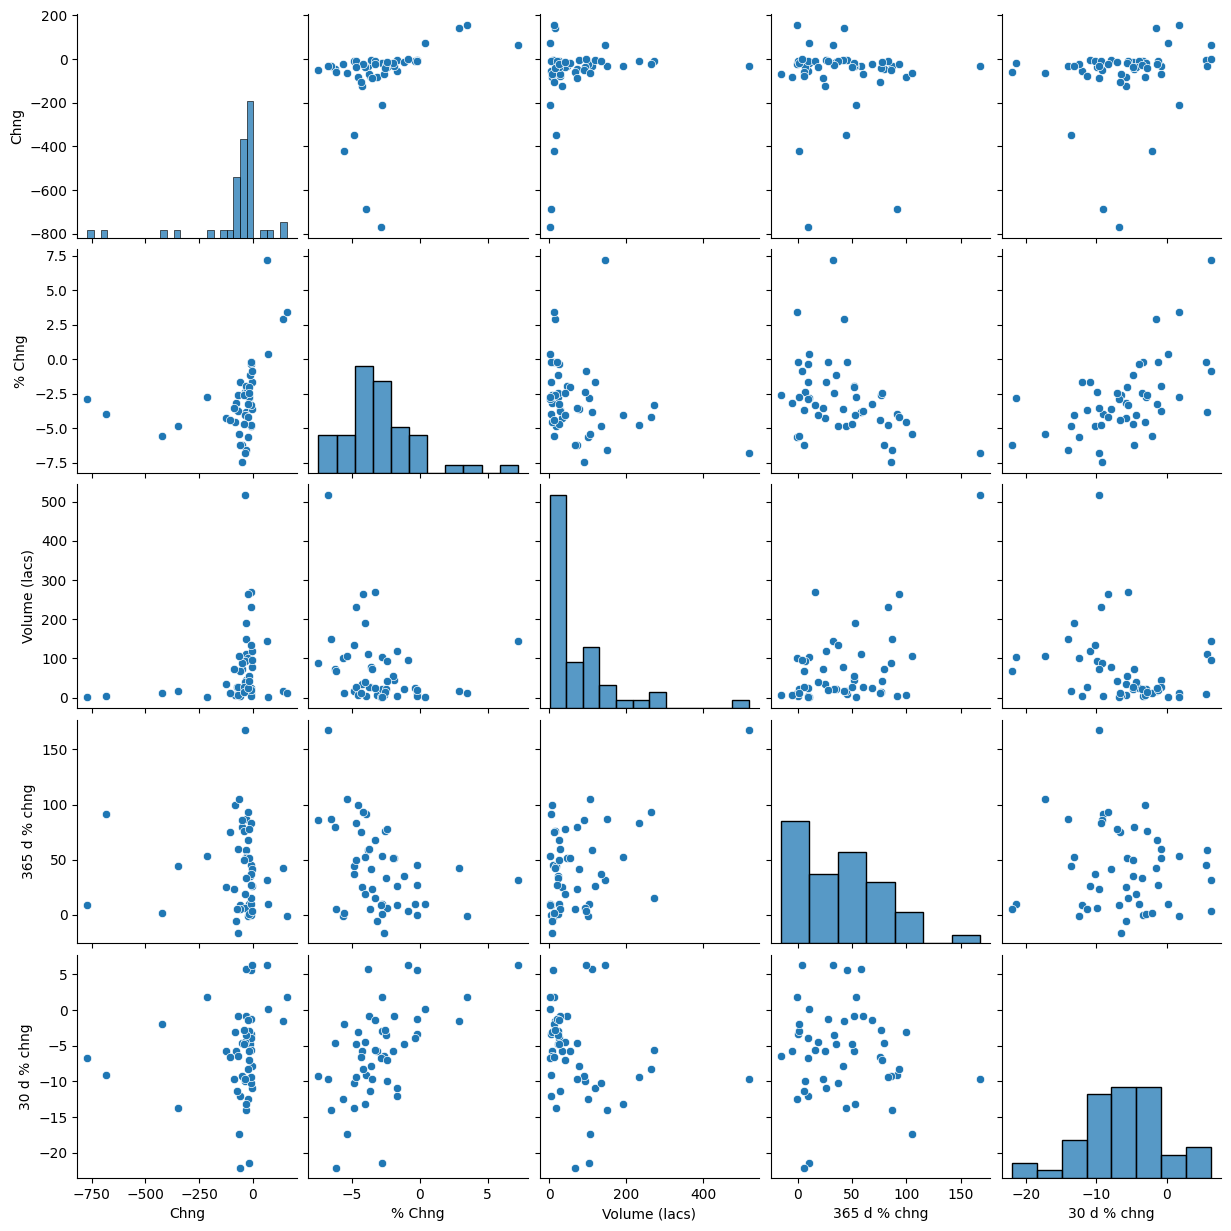

In [45]:
sns.pairplot(data)

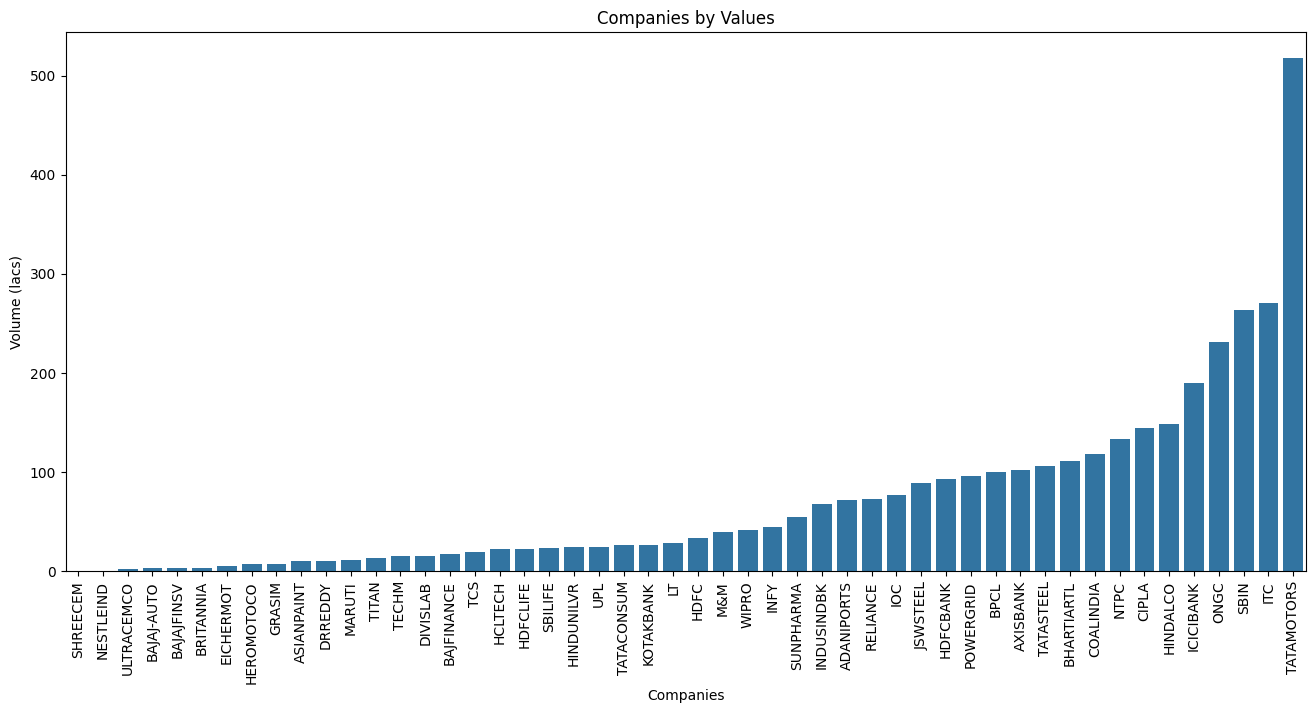

In [61]:
plt.figure(figsize = (16,7))
plt.xticks(rotation = 90)


sns.barplot(data = data.sort_values(by = ['Volume (lacs)'], ascending = True), x = 'Symbol', y = 'Volume (lacs)')
plt.xlabel("Companies")
plt.title("Companies by Values")
plt.show()

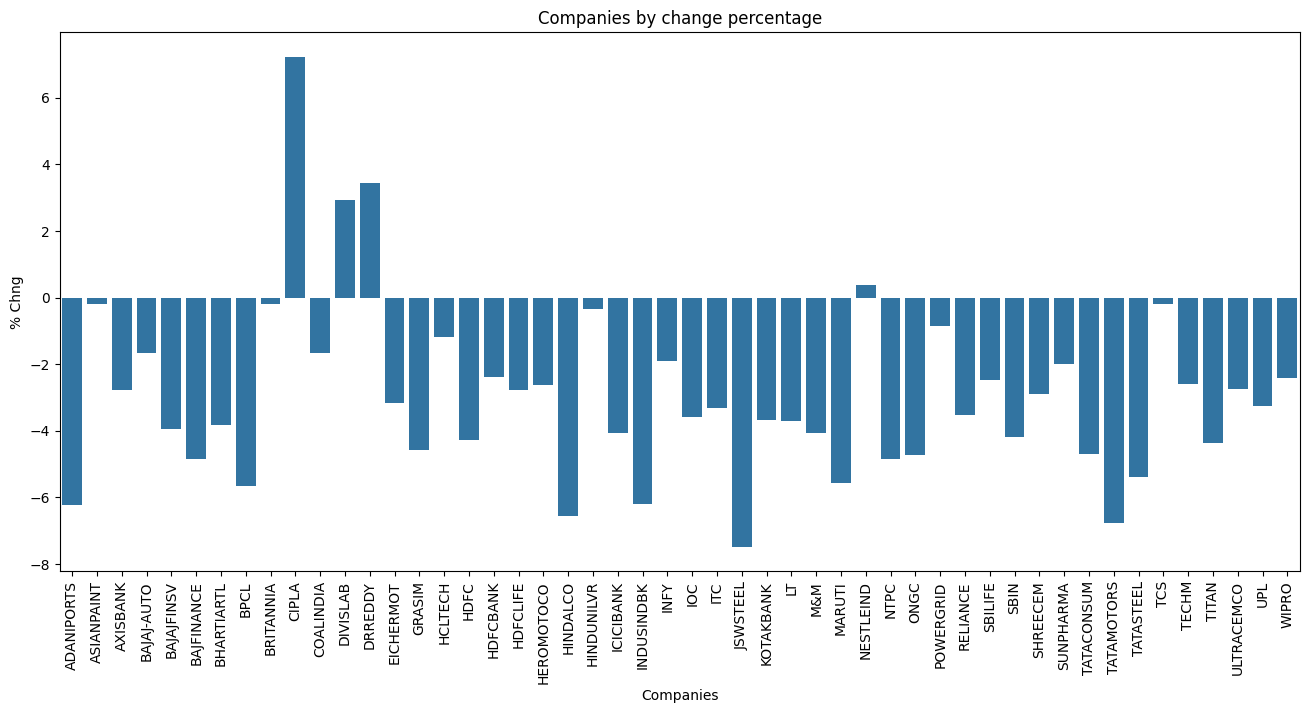

In [63]:
plt.figure(figsize = (16,7))
plt.xticks(rotation = 90)

sns.barplot(data = data, x = 'Symbol', y = '% Chng')
plt.xlabel("Companies")
plt.title("Companies by change percentage")
plt.show()

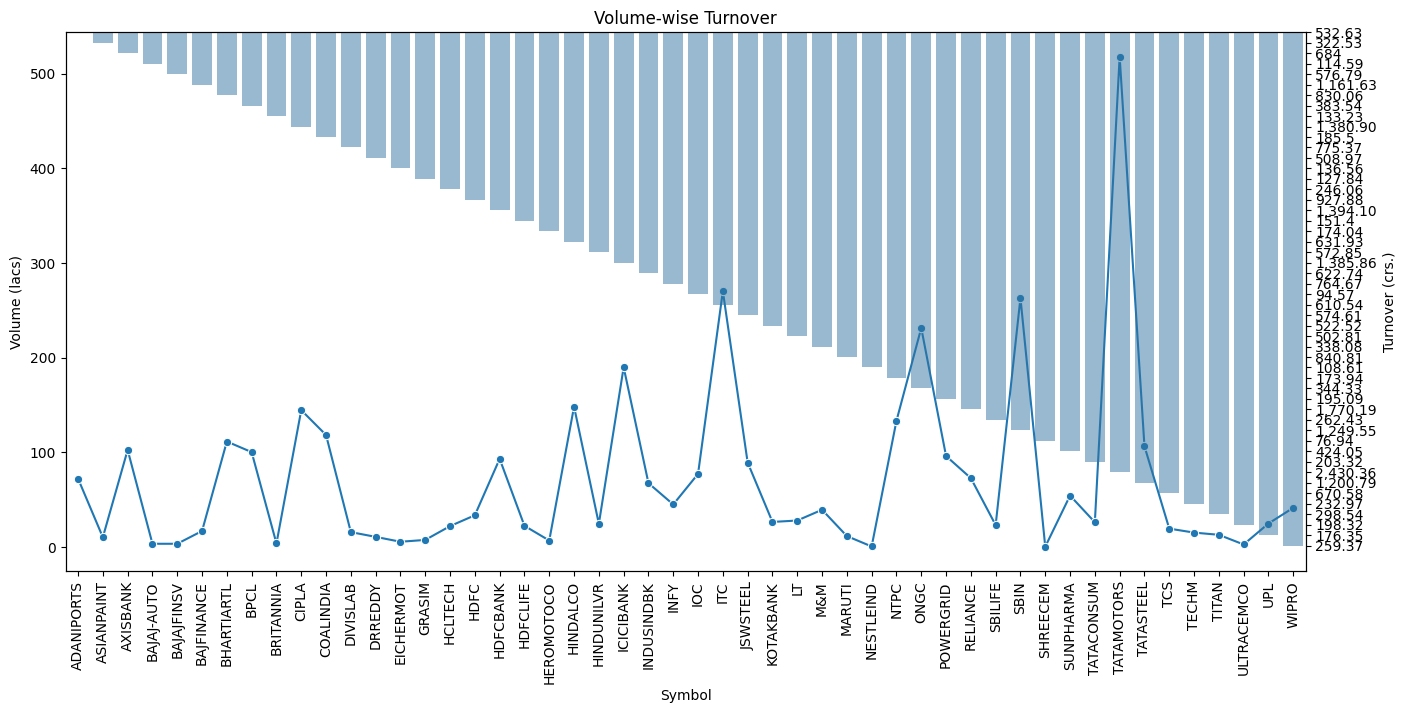

In [66]:
fig, ax1 = plt.subplots(figsize=(16,7))
plt.xticks(rotation = 90)
sns.lineplot(data = data, x = 'Symbol', y = 'Volume (lacs)', marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = data, x = 'Symbol', y = 'Turnover (crs.)', alpha=0.5, ax=ax2)
plt.xlabel('Companies')
plt.title('Volume-wise Turnover')
plt.show()

<Axes: >

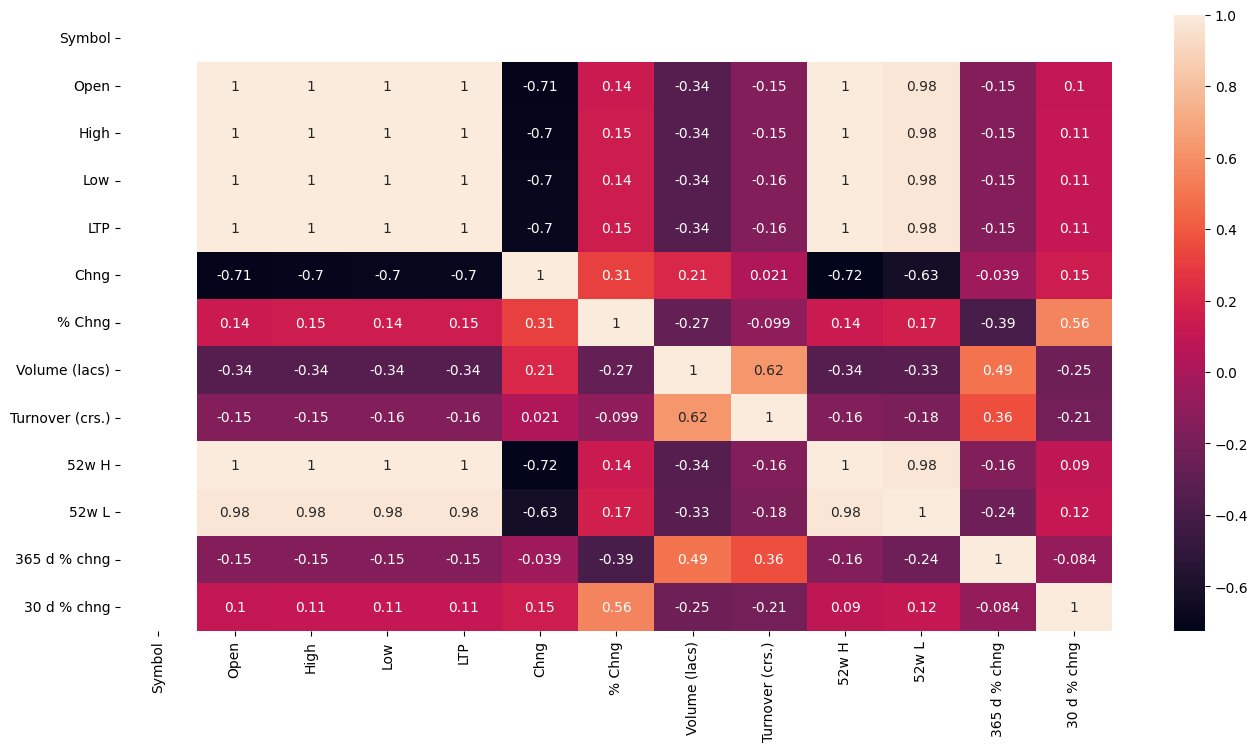

In [56]:
plt.figure(figsize = (16,8))
sns.heatmap(data.corr(), annot = True)

# ***Open, high, low and LTP are highly co-related features, we can use any one of them to create model.***

#Pre-Processing

##Non-stationary Data:<br>
To handle non-stationary data, the following preprocessing steps were implemented:
<br><br>

Normalization: <br><br>
MinMaxScaler was used to scale the features to a specific range (0, 1). Normalizing the data helps in stabilizing the training process and improving convergence.
<br><br>
Handling Missing Values: Missing values were filled with the mean of the column to ensure that the dataset is complete before training the models.
<br><br>
Feature Engineering: <br><br>No explicit feature engineering was performed in the provided code. However, extracting relevant features from the time-series data can help in capturing meaningful patterns and trends. Feature engineering techniques such as rolling window statistics, technical indicators (e.g., moving averages, RSI), and lagged features can be explored to capture the underlying patterns in the data better.

##Noise and Volatility:<br>
To address the noise and volatility in the data:
<br><br>
Data Preprocessing:<br><br> The data was preprocessed to remove commas and convert all columns to numeric values. Handling missing values by filling them with the mean of the column helps in reducing noise and ensuring that the dataset is clean before training the models.
<br><br>
Model Architecture:<br><br> Deep learning models like GRU, LSTM and BiLSTM are capable of capturing complex patterns and long-term dependencies in the data, which can help in filtering out noise and identifying relevant signals amidst volatility.

In [47]:
# Remove commas from the data
data.replace(',', '', regex=True, inplace=True)

In [17]:
# Drop 'Symbol' column as it is not needed for prediction
data.drop('Symbol', axis=1, inplace=True)
data.drop('Chng', axis=1, inplace=True)
data.drop('% Chng', axis=1, inplace=True)
data.drop('Volume (lacs)', axis=1, inplace=True)
data.drop('Turnover (crs.)', axis=1, inplace=True)
data.drop('52w H', axis=1, inplace=True)
data.drop('52w L', axis=1, inplace=True)
data.drop('365 d % chng', axis=1, inplace=True)
data.drop('30 d % chng', axis=1, inplace=True)

# Remove commas from the data
data.replace(',', '', regex=True, inplace=True)

In [49]:
# Convert all columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    50 non-null     float64
 1   High    50 non-null     float64
 2   Low     50 non-null     float64
 3   LTP     50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [20]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

<b>Model Overfitting:</b><br><br>
To prevent overfitting while training the models:
<br><br>

<b>Train-Test Split:</b>
<br><br>The dataset was split into training and testing sets to evaluate the model's performance on unseen data.
<br><br>
<b>Regularization:</b><br><br> No explicit regularization techniques like dropout or L2 regularization were used in the provided code. Incorporating dropout layers or L2 regularization can help in preventing overfitting and improving the model's generalization capabilities.
<br><br>
<b>Model Complexity:</b><br><br> The models used in the provided code (RNN, GRU LSTM, BiLSTM) have a relatively simple architecture. Experimenting with different architectures, adding more layers, or adjusting the number of units can help in capturing the underlying patterns in the data without overfitting.
<br><br>
<b>Hyperparameter Tuning:</b> <br><br>Hyperparameters like learning rate, batch size, and number of epochs were not explicitly optimized in the provided code. Hyperparameter tuning using techniques like grid search or random search can help in finding the optimal set of hyperparameters that yield the best performance without overfitting.



In [21]:
# Split the data into training and testing sets
X = data_normalized[:, :-1]  # Features
y = data_normalized[:, -1]   # Target (LTP)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Inverse transform to get the original scale
y_test_inverse = scaler.inverse_transform(np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1))[:, -1]

In [23]:
# RNN Model
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(0.4))
    model.add(SimpleRNN(64, activation='relu', return_sequences=True))
    model.add(Dropout(0.4))
    model.add(SimpleRNN(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return model

In [24]:
# GRU Model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(100, input_shape=input_shape, activation='tanh', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(100, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

In [25]:
# LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return model

In [26]:
# BiLSTM Model
def build_bilstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
    model.add(Dropout(0.4))
    model.add(Bidirectional(LSTM(32, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return model

In [27]:
# Compute metrics
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Performace Measure


The performance of the RNN model can be assessed based on the following regression metrics:
<br><br>

Mean Squared Error (MSE): <br><br>It measures the average squared difference between the predicted and actual values. Lower values of MSE indicate better model performance.
<br><br>
Mean Absolute Error (MAE): <br><br>It measures the average absolute difference between the predicted and actual values. Lower values of MAE indicate better model performance.
<br><br>
R-squared (R^2):<br><br> It represents the proportion of the variance for the dependent variable that's explained by independent variables in the model. A higher value of R^2 indicates a better fit of the model to the data.

In [28]:
input_shape = (X_train.shape[1], 1)  # Number of features

In [29]:
# Build models
rnn_model = build_rnn_model(input_shape)

In [30]:
# Train RNN Model
rnn_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=300, batch_size=64, verbose=1)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 0.0083
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 0.0072
Epoch 3/300
1/1 [==============================] - 0s 14ms/step - loss: 0.0052
Epoch 4/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0098
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 0.0063
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0067
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 0.0090
Epoch 8/300
1/1 [==============================] - 0s 14ms/step - loss: 0.0045
Epoch 9/300
1/1 [==============================] - 0s 14ms/step - loss: 0.0067
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 0.0038
Epoch 11/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0049
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 0.0036
Epoch 13/300
1/1 [==============================] -

In [31]:
rnn_loss = rnn_model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)

1/1 [==============================] - 0s 447ms/step - loss: 0.0058


In [32]:
# Predictions
rnn_preds = rnn_model.predict(X_test.reshape(-1, X_test.shape[1], 1))

1/1 [==============================] - 0s 392ms/step


In [33]:
rnn_preds_inverse = scaler.inverse_transform(np.concatenate((X_test, rnn_preds), axis=1))[:, -1]

In [34]:
rnn_mse, rnn_mae, rnn_r2 = compute_metrics(y_test_inverse, rnn_preds_inverse)

In [35]:
print("RNN Metrics:")
print()
print(f'RNN Model Loss: {rnn_loss}')
print(f"MSE: {rnn_mse}")
print(f"MAE: {rnn_mae}")
print(f"R^2: {rnn_r2*100}")

RNN Metrics:

RNN Model Loss: 0.005768475588411093
MSE: 3833435.6323385723
MAE: 1063.5759090279419
R^2: 94.93406364977857


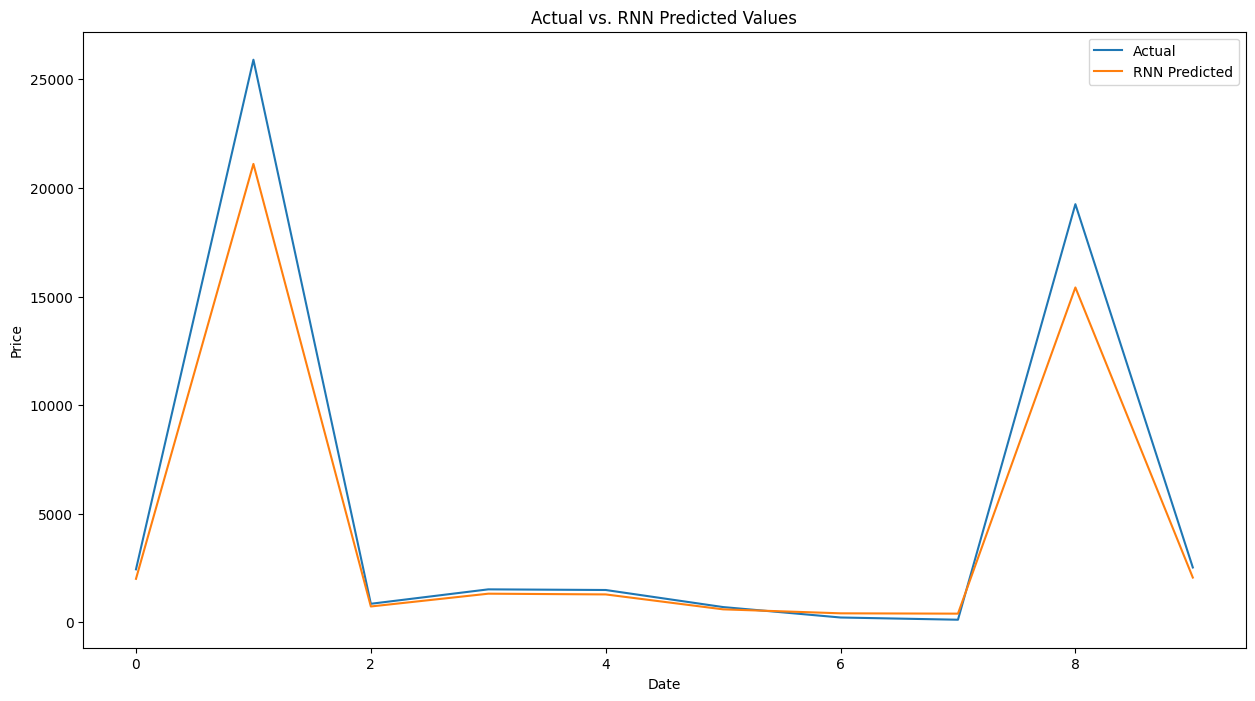

In [95]:
# Create a DataFrame for visualization
results_line = pd.DataFrame({
    'Date': np.arange(len(y_test)),  # Assuming the test set has a time-based order
    'Actual': y_test_inverse,
    'RNN Predicted': rnn_preds_inverse
})

# Line plot for Actual vs. RNN Predicted values
plt.figure(figsize=(15, 8))
sns.lineplot(data=results_line, x='Date', y='Actual', label='Actual')
sns.lineplot(data=results_line, x='Date', y='RNN Predicted', label='RNN Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. RNN Predicted Values')
plt.legend()
plt.show()

In [67]:
# Build the GRU model
gru_model = build_gru_model(input_shape)

In [68]:
# Train the GRU model
gru_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=300, batch_size=64, verbose=1)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 0.0254
Epoch 2/300
1/1 [==============================] - 0s 24ms/step - loss: 0.0160
Epoch 3/300
1/1 [==============================] - 0s 26ms/step - loss: 0.0116
Epoch 4/300
1/1 [==============================] - 0s 21ms/step - loss: 0.0126
Epoch 5/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0088
Epoch 6/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0086
Epoch 7/300
1/1 [==============================] - 0s 25ms/step - loss: 0.0091
Epoch 8/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0069
Epoch 9/300
1/1 [==============================] - 0s 25ms/step - loss: 0.0056
Epoch 10/300
1/1 [==============================] - 0s 22ms/step - loss: 0.0041
Epoch 11/300
1/1 [==============================] - 0s 22ms/step - loss: 0.0028
Epoch 12/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0029
Epoch 13/300
1/1 [==============================] -

In [69]:
# Predictions
gru_preds = gru_model.predict(X_test.reshape(-1, X_test.shape[1], 1))

1/1 [==============================] - 1s 1s/step


In [70]:
gru_preds_inverse = scaler.inverse_transform(np.concatenate((X_test, gru_preds), axis=1))[:, -1]

In [71]:
# Evaluate the GRU model
gru_loss = gru_model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)

1/1 [==============================] - 1s 770ms/step - loss: 1.1817e-04


In [72]:
gru_mse, gru_mae, gru_r2 = compute_metrics(y_test_inverse, gru_preds_inverse)

In [73]:
print("GRU Metrics:")
print()
print(f'GRU Model Loss: {gru_loss}')
print(f"MSE: {gru_mse}")
print(f"MAE: {gru_mae}")
print(f"R^2: {gru_r2*100}")

GRU Metrics:

GRU Model Loss: 0.00011817061749752611
MSE: 78530.70783150192
MAE: 201.88830579024776
R^2: 99.89622062150825


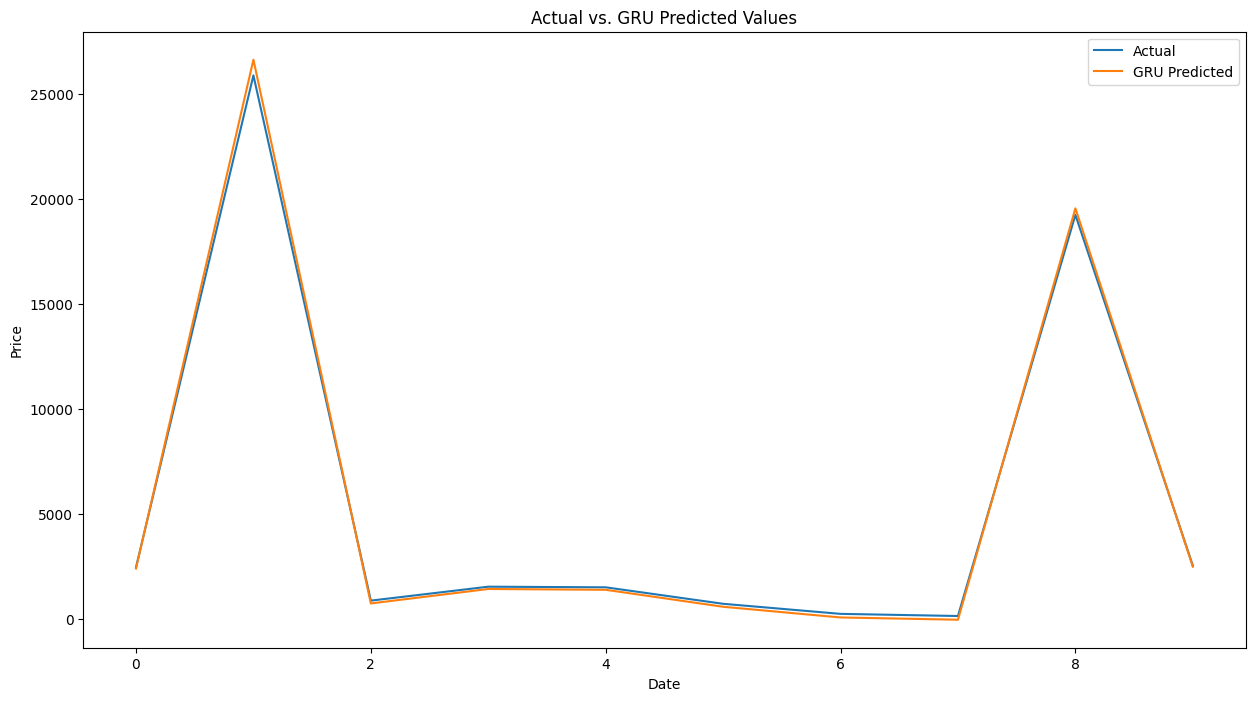

In [74]:
# Create a DataFrame for visualization
results_line = pd.DataFrame({
    'Date': np.arange(len(y_test)),  # Assuming the test set has a time-based order
    'Actual': y_test_inverse,
    'GRU Predicted': gru_preds_inverse
})

# Line plot for Actual vs. RNN Predicted values
plt.figure(figsize=(15, 8))
sns.lineplot(data=results_line, x='Date', y='Actual', label='Actual')
sns.lineplot(data=results_line, x='Date', y='GRU Predicted', label='GRU Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. GRU Predicted Values')
plt.legend()
plt.show()

In [75]:
lstm_model = build_lstm_model(input_shape)

In [76]:
# Train LSTM Model
lstm_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=300, batch_size=64, verbose=1)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 0.0207
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 0.0206
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 0.0206
Epoch 4/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0205
Epoch 5/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0204
Epoch 6/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0204
Epoch 7/300
1/1 [==============================] - 0s 18ms/step - loss: 0.0203
Epoch 8/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0203
Epoch 9/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0202
Epoch 10/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0201
Epoch 11/300
1/1 [==============================] - 0s 17ms/step - loss: 0.0201
Epoch 12/300
1/1 [==============================] - 0s 17ms/step - loss: 0.0200
Epoch 13/300
1/1 [==============================] -

In [77]:
# Evaluate Models
lstm_loss = lstm_model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)

1/1 [==============================] - 1s 751ms/step - loss: 0.0296


In [78]:
lstm_preds = lstm_model.predict(X_test.reshape(-1, X_test.shape[1], 1))

1/1 [==============================] - 1s 874ms/step


In [79]:
lstm_preds_inverse = scaler.inverse_transform(np.concatenate((X_test, lstm_preds), axis=1))[:, -1]

In [80]:
lstm_mse, lstm_mae, lstm_r2 = compute_metrics(y_test_inverse, lstm_preds_inverse)

In [81]:
print("LSTM Metrics:")
print()
print(f'LSTM Model Loss: {lstm_loss}')
print(f"MSE: {lstm_mse}")
print(f"MAE: {lstm_mae}")
print(f"R^2: {lstm_r2*100}")

LSTM Metrics:

LSTM Model Loss: 0.029613543301820755
MSE: 19679653.08446152
MAE: 2538.2346869995076
R^2: 73.99307579882279


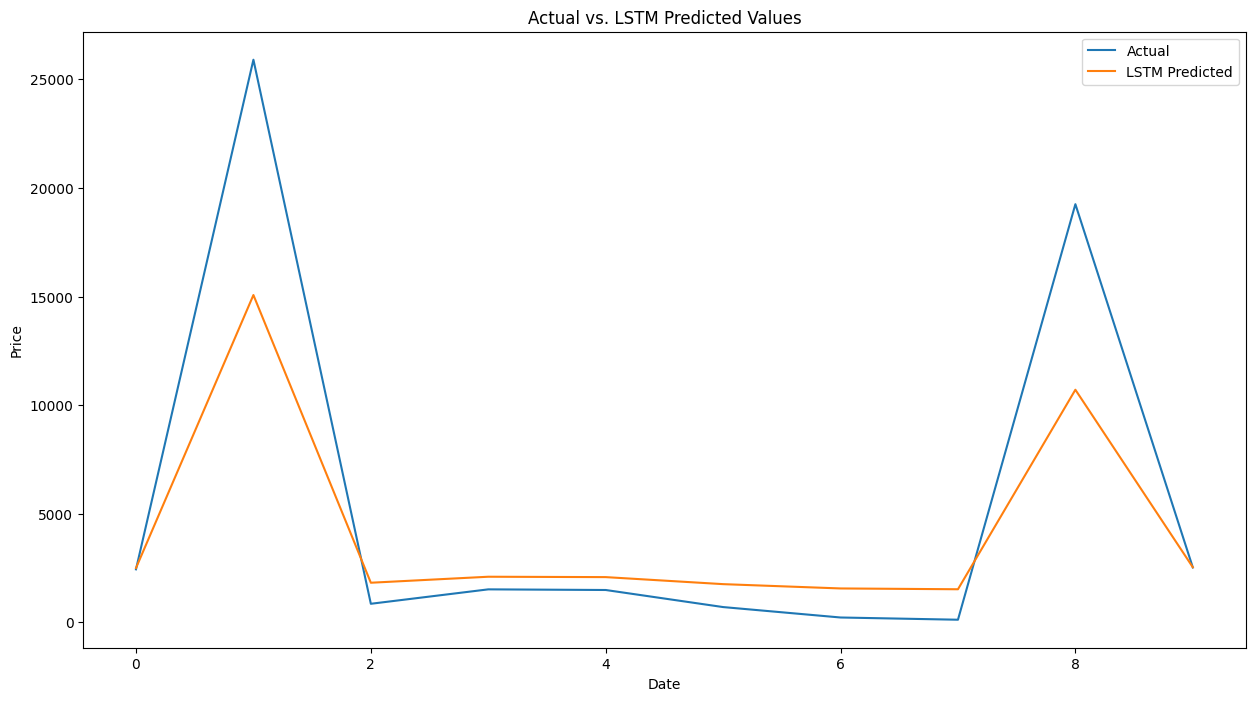

In [82]:
# Create a DataFrame for visualization
results_line = pd.DataFrame({
    'Date': np.arange(len(y_test)),  # Assuming the test set has a time-based order
    'Actual': y_test_inverse,
    'LSTM Predicted': lstm_preds_inverse
})

# Line plot for Actual vs. RNN Predicted values
plt.figure(figsize=(15, 8))
sns.lineplot(data=results_line, x='Date', y='Actual', label='Actual')
sns.lineplot(data=results_line, x='Date', y='LSTM Predicted', label='LSTM Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. LSTM Predicted Values')
plt.legend()
plt.show()

In [83]:
bilstm_model = build_bilstm_model(input_shape)

In [84]:
# Train BiLSTM Model
bilstm_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=300, batch_size=64, verbose=1)

Epoch 1/300
1/1 [==============================] - 8s 8s/step - loss: 0.0206
Epoch 2/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0205
Epoch 3/300
1/1 [==============================] - 0s 28ms/step - loss: 0.0205
Epoch 4/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0203
Epoch 5/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0203
Epoch 6/300
1/1 [==============================] - 0s 31ms/step - loss: 0.0201
Epoch 7/300
1/1 [==============================] - 0s 30ms/step - loss: 0.0200
Epoch 8/300
1/1 [==============================] - 0s 31ms/step - loss: 0.0199
Epoch 9/300
1/1 [==============================] - 0s 29ms/step - loss: 0.0198
Epoch 10/300
1/1 [==============================] - 0s 31ms/step - loss: 0.0197
Epoch 11/300
1/1 [==============================] - 0s 32ms/step - loss: 0.0197
Epoch 12/300
1/1 [==============================] - 0s 32ms/step - loss: 0.0194
Epoch 13/300
1/1 [==============================] -

In [85]:
bilstm_loss = bilstm_model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)

1/1 [==============================] - 1s 1s/step - loss: 4.8694e-04


In [86]:
bilstm_preds = bilstm_model.predict(X_test.reshape(-1, X_test.shape[1], 1))

1/1 [==============================] - 1s 798ms/step


In [87]:
bilstm_preds_inverse = scaler.inverse_transform(np.concatenate((X_test, bilstm_preds), axis=1))[:, -1]

In [88]:
bilstm_mse, bilstm_mae, bilstm_r2 = compute_metrics(y_test_inverse, bilstm_preds_inverse)

In [89]:
print("BiLSTM Metrics:")
print()
print(f'BiLSTM Model Loss: {bilstm_loss}')
print(f"MSE: {bilstm_mse}")
print(f"MAE: {bilstm_mae}")
print(f"R^2: {bilstm_r2*100}")

BiLSTM Metrics:

BiLSTM Model Loss: 0.00048694355064071715
MSE: 323597.97103805817
MAE: 405.9810681432672
R^2: 99.5723609624457


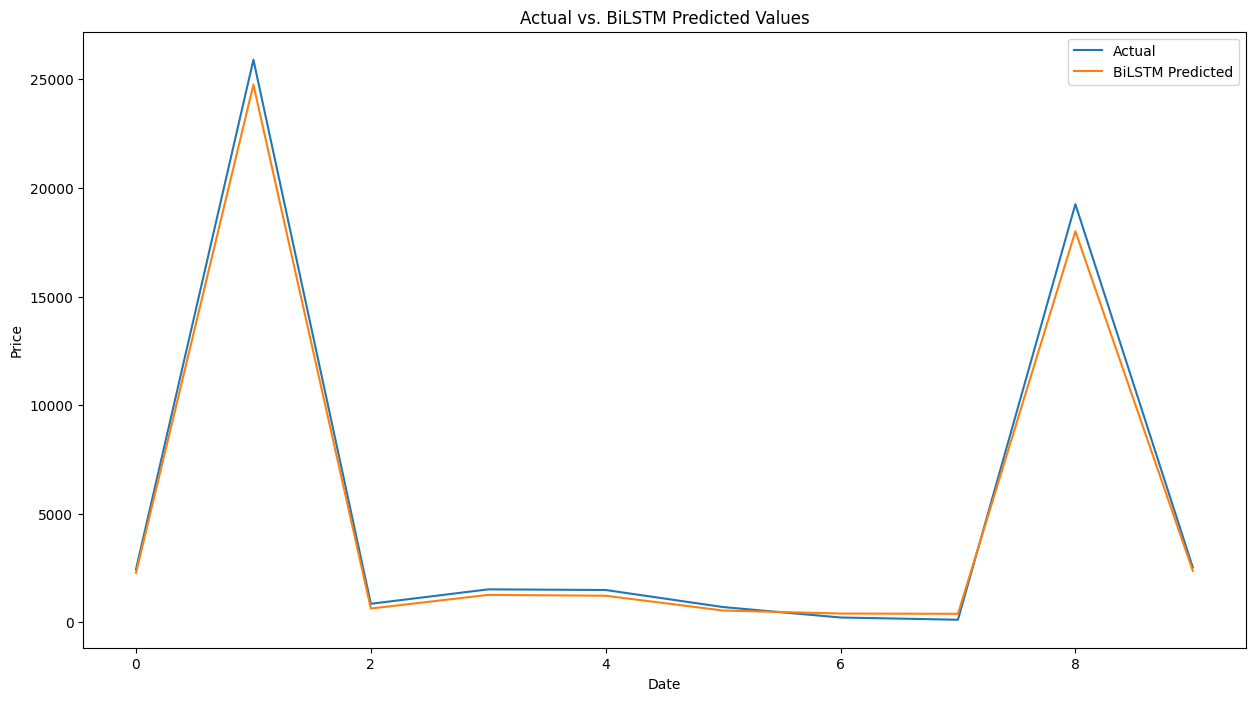

In [90]:
# Create a DataFrame for visualization
results_line = pd.DataFrame({
    'Date': np.arange(len(y_test)),  # Assuming the test set has a time-based order
    'Actual': y_test_inverse,
    'BiLSTM Predicted': bilstm_preds_inverse
})

# Line plot for Actual vs. RNN Predicted values
plt.figure(figsize=(15, 8))
sns.lineplot(data=results_line, x='Date', y='Actual', label='Actual')
sns.lineplot(data=results_line, x='Date', y='BiLSTM Predicted', label='BiLSTM Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. BiLSTM Predicted Values')
plt.legend()
plt.show()

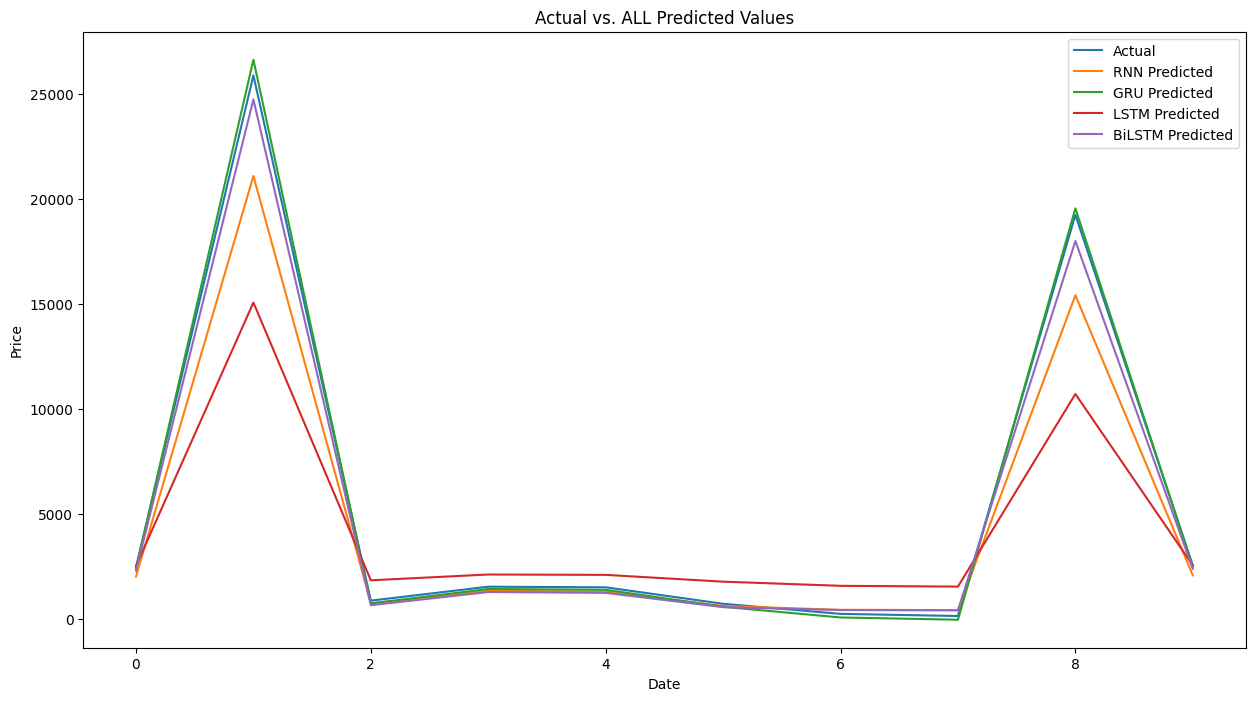

In [91]:
# Create a DataFrame for visualization
results_line = pd.DataFrame({
    'Date': np.arange(len(y_test)),  # Assuming the test set has a time-based order
    'Actual': y_test_inverse,
    'RNN Predicted': rnn_preds_inverse,
    'GRU Predicted': gru_preds_inverse,
    'LSTM Predicted': lstm_preds_inverse,
    'BiLSTM Predicted': bilstm_preds_inverse
})

# Line plot for Actual vs. RNN Predicted values
plt.figure(figsize=(15, 8))
sns.lineplot(data=results_line, x='Date', y='Actual', label='Actual')
sns.lineplot(data=results_line, x='Date', y='RNN Predicted', label='RNN Predicted')
sns.lineplot(data=results_line, x='Date', y='GRU Predicted', label='GRU Predicted')
sns.lineplot(data=results_line, x='Date', y='LSTM Predicted', label='LSTM Predicted')
sns.lineplot(data=results_line, x='Date', y='BiLSTM Predicted', label='BiLSTM Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. ALL Predicted Values')
plt.legend()
plt.show()

#Performance Comparison:
###GRU Model:

GRU Model Loss: 0.00011<br>
MSE: 78530.71<br>
MAE: 201.89<br>
R^2: 99.9<br>

###BiLSTM Model:

BiLSTM Model Loss: 0.00049<br>
MSE: 323597.97<br>
MAE: 405.98<br>
R^2: 99.57<br>

###RNN Metrics:

RNN Model Loss: 0.0058<br>
MSE: 3833435.63<br>
MAE: 1063.58<br>
R^2: 94.93<br>

###LSTM Model:

LSTM Model Loss: 0.03<br>
MSE: 19679653.08<br>
MAE: 2538.23<br>
R^2: 73.99<br>




###Ranking:

<b>Based on the performance metrics:</b>
<br><br>

<b>GRU Model</b> has the lowest MSE (78530.71), lowest MAE (201.89), and the highest R^2 (99.9) among all the models, making it the <b>best-performing</b> model among the ones evaluated.<br><br>

<b>BiLSTM Model</b> is the <b>second-best</b> with lower MSE (323597.97) and MAE (405.98) compared to the GRU model but better than LSTM and RNN. The R^2 value (99.57) is also better than LSTM and RNN.<br><br>

<b>RNN Model</b> and <b>LSTM Model</b> have the MSE (3833435.63 for RNN and 19679653.08 for LSTM), MAE (1063.58 for RNN and 2538.23 for LSTM), and the R^2 (94.93 for LSTM and 73.99 for LSTM), indicating <b>poorer performance</b> compared to BiLSTM and GRU models.<br><br>

##Conclusion:
<br>
<b>GRU Model</b> is the <b>best-performing model</b> for stock market price prediction among the evaluated models, followed by the <b>BiLSTM Model</b>.
<br><br>
<b>RNN Model</b> and <b>LSTM Model</b> performed relatively <b>poorly compared to the GRU and BiLSTM models</b>.
<br><br>
It's worth noting that while the GRU model performed the best based on these metrics, it's essential to consider other factors like model complexity, training time, and interpretability when choosing the best model for a specific application.